# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print "Modules Imported!"

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

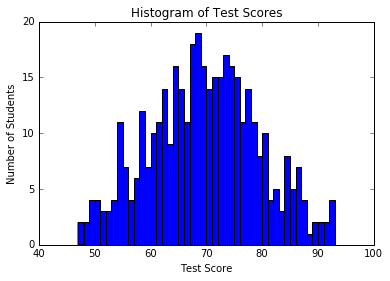

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

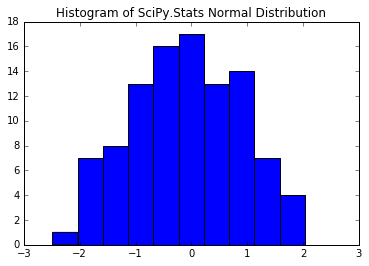

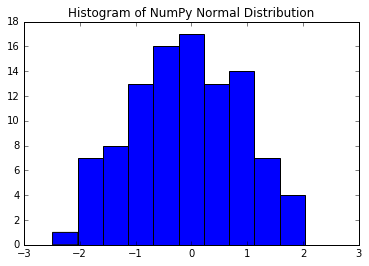

In [40]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x) #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y)
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

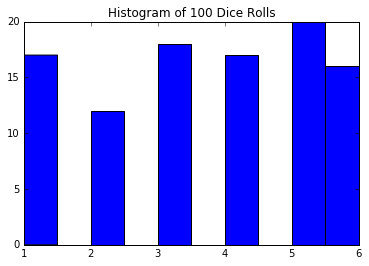

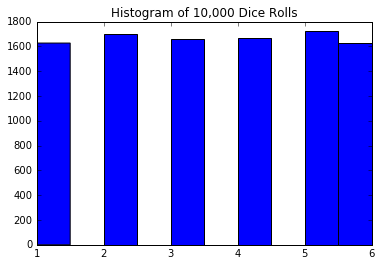

In [52]:
# Your code here
p = (1./6, 1./6, 1./6, 1./6, 1./6, 1./6)
c = (1, 2, 3, 4, 5, 6)
dieDist = st.rv_discrete(values=(c,p))
x = dieDist.rvs(size=100)
y = dieDist.rvs(size=10000)

plt.hist(x)
plt.title("Histogram of 100 Dice Rolls")
plt.figure()
plt.hist(y)
plt.title("Histogram of 10,000 Dice Rolls")

__Answer:__ The histogram for 10,000 dice rolls looks much more uniform than that of 100, but both are more flat than skewed.  The difference in uniformity comes from the fact that random numbers are not generated evenely, but even out over a large number of samples.  Therefore, the larger sample size of the 10,000 roll shows less variability between the outcomes.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

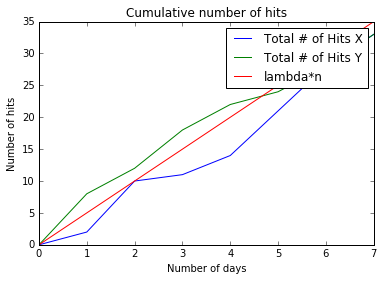

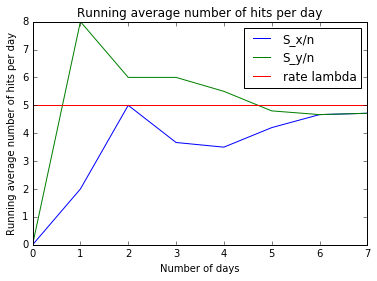

In [53]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

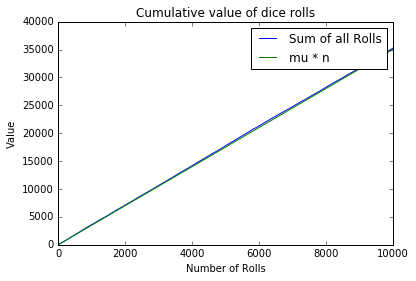

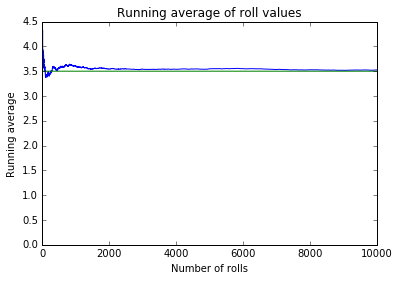

In [5]:
# Your code here
p = (1./6, 1./6, 1./6, 1./6, 1./6, 1./6)
c = (1, 2, 3, 4, 5, 6)
dieDist = st.rv_discrete(values=(c,p))

N = 10000 # number of rolls to simulate
mu = 21./6 # mean value of a dice roll
x = [dieDist.rvs()]
Sx = [0]
Ax = [0]

for i in range(1,N+1):
    x.append(dieDist.rvs())
    Sx.append(Sx[i-1] + x[i])
    Ax.append(Sx[i]/(1.*i))
    
n = np.linspace(0,N,N+1)

plt.plot(Sx, label = 'Sum of all Rolls')
plt.plot(n, mu*n, label = 'mu * n')
plt.title('Cumulative value of dice rolls')
plt.xlabel('Number of Rolls')
plt.ylabel('Value')
plt.legend()

plt.figure()
plt.plot(Ax, label = 'S_x/n')
plt.plot(mu * np.ones(N+1), label = 'mu')
plt.title('Running average of roll values')
plt.xlabel('Number of rolls')
plt.ylabel('Running average')

__Answer:__<br>
An approximation of the average is (1+2+3+4+5+6)/6 = 21/6 = 3.5<br>
An approximation of the sum is n\*average, so for n=10000, sum = 35000

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

__Ways to make TWO PAIR__<br>
The two pairs can have any 2 of the 13 ranks, and each pair can have any 2 of the 4 suits. The 5th card can be any of the 11 remaining ranks and any one suit.<br>
TWO_PAIR = $\binom{13}{2}\binom{4}{2}^2 \binom{11}{1}\binom{4}{1}$

__Ways to make THREE OF A KIND__<br>
The three of a kind can be any 1 of the 13 ranks, and any 3 of the 4 suits. The other 2 cards can be any 2 of the 12 remaining ranks and each one can be any suit.<br>
THREE_OF_A_KIND = $\binom{13}{1}\binom{4}{3}\binom{12}{2}\binom{4}{1}^2$

__Ways to make FULL HOUSE__<br>
The three of a kind can be any 1 of the 13 ranks, and any 3 of the 4 suits. The pair can be any 1 of the remaining 12 ranks and any 2 of the 4 suits.<br>
FULL_HOUSE = $\binom{13}{1}\binom{4}{3}\binom{12}{1}\binom{4}{2}$

__Ways to make FLUSH__<br>
The five cards must have any 1 of the 4 suits, and any 5 of the 13 ranks.<br>
FLUSH = $\binom{13}{5}\binom{4}{1}$

In [24]:
# Your code here (add addtitional code/markdown cells if needed)
def binom(n,k):
    return sp.special.binom(n,k)

# number of ways to make each hand:
two_pair = binom(13,2) * binom(4,2)**2 * binom(11,1) * binom(4,1) 
three_kind = binom(13,1) * binom(4,3) * binom(12,2) * binom(4,1)**2
full_house = binom(13,1) * binom(4,3) * binom(12,1) * binom(4,2)
flush = binom(13,5) * binom(4,1)

# number of possible hands
total = binom(52,5)

print 'Expected Probabilities:'
print 'Probability of 2 Pair =', two_pair / total
print 'Probability of 3 of a Kind =', three_kind / total
print 'Probability of Full House =', full_house / total
print 'Probability of Flush =', flush / total

Expected Probabilities:
Probability of 2 Pair = 0.0475390156062
Probability of 3 of a Kind = 0.0211284513806
Probability of Full House = 0.00144057623049
Probability of Flush = 0.00198079231693


__Expected Probabilities:__<br>
Probability of 2 Pair = 0.0475390156062<br>
Probability of 3 of a Kind = 0.0211284513806<br>
Probability of Full House = 0.00144057623049<br>
Probability of Flush = 0.00198079231693<br>

In [26]:
import numpy as np

# simulate 1,000,000 poker hands
N = 1000000

num_2_pair = 0
num_3_kind = 0
num_full_house = 0
num_flush = 0


for i in range(N):
    deck = np.zeros((4,13),int)

    # loop (at least) 5 times to choose 5 random cards
    num_cards = 0
    while num_cards < 5:
        index1 = np.random.randint(4)
        index2 = np.random.randint(13)
        # if we already picked this card, pick another one
        if deck[index1][index2] == 1:
            continue
        # otherwise pick it and count it
        deck[index1][index2] = 1
        num_cards += 1

    # flags for keeping track of what's in the hand
    has_pair = False
    has_2pair = False
    has_triple = False

    # check for flush
    for suit in deck:
        if suit.sum() == 5:
            num_flush += 1
            break

    # check for full house
    for i in range(13):
        column_sum = deck[:,i].sum()
        if column_sum == 2:
            if has_pair:
                has_2pair = True
            else:
                has_pair = True
        if column_sum == 3:
            has_triple = True

        if (has_pair and has_triple):
            num_full_house += 1
            break

    # check for triple
    if not has_pair and has_triple:
        num_3_kind += 1

    # check for two pair
    if has_2pair:
        num_2_pair += 1

print 'Experimental Probabilities:'
print 'Probability of 2 Pair =', (1.* num_2_pair) / N
print 'Probability of 3 of a Kind =', (1.* num_3_kind) / N
print 'Probability of Full House =', (1.* num_full_house) / N
print 'Probability of Flush =', (1.* num_flush) / N

Experimental Probabilities:
Probability of 2 Pair = 0.047525
Probability of 3 of a Kind = 0.021077
Probability of Full House = 0.001416
Probability of Flush = 0.002043


__Experimental Probabilities:__<br>
Probability of 2 Pair = 0.047525<br>
Probability of 3 of a Kind = 0.021077<br>
Probability of Full House = 0.001416<br>
Probability of Flush = 0.002043<br>

__Answer:__<br>
These results agree very strongly with the expected results calculated above.  Each value agrees to about the 3rd or 4th decimal place, or 0.1%

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

__Answer of Part 1:__ You should switch because when you originally made your choice, you had a 1/3 chance of getting the valuable prize.  Opening a worthless door does not change the chances that you originally chose the valuable item, so there is still a 2/3 chance that the valuable item is behind the other door.

In [33]:
# Your code here (add addtitional code/markdown cells if needed)
N = 1000000

# track how many wins we accumulate with each strategy
switch_count = 0
stay_count = 0

for i in range(N):
    # choose two doors, one to hold the prize and one as our choice
    doors = np.random.randint(3, size=2)

    # There are two possible outcomes after choosing a door:
    # 1) We chose the winning door, in which case switching will lose and staying will win
    # 2) We didn't choose the winning door, so switching will win and staying will loose
    if doors[0] == doors[1]:
        stay_count += 1
    else:
        switch_count += 1

switch_win_rate = (1. * switch_count) / N
stay_win_rate = (1. * stay_count) / N

print 'Win percentage by switching = {}%'.format(switch_win_rate * 100)
print 'Win percentage by staying = {}%'.format(stay_win_rate * 100)

Win percentage by switching = 66.6177%
Win percentage by staying = 33.3823%


__Answer of Part 4:__<br>
This simulation confirms that it is better (on average) to switch doors than to stick with your choice.  This is because the revealing of the empty door does not change the probability of the event that has already happened (you chosing the right door), so the chances that you picked the right door are still one in three.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 